In [1]:
import pandas as pd
import numpy as np

In [2]:
wt= pd.read_excel("Global Visa Wait Times recent.xlsx")

In [3]:
wt.head(25)

,City/Post,"Interview Required\n\nStudent/Exchange Visitors (F, M, J)","Interview Required\n\nPetition-Based Temporary Workers (H, L, O, P, Q)","Interview Required\n\nCrew and Transit (C, D, C1/D)",Interview Required\n\nVisitors (B1/B2)
0,Abidjan,1 Day,1 Day,1 Day,36 Days
1,Abu Dhabi,6 Days,33 Days,NaN,382 Days
2,Abuja,190 Days,4 Days,695 Days,695 Days
3,Accra,402 Days,31 Days,3 Days,403 Days
4,Adana,NaN,NaN,NaN,Closed
5,Addis Ababa,58 Days,58 Days,11 Days,156 Days
6,Algiers,101 Days,1 Day,1 Day,179 Days
7,Almaty,7 Days,8 Days,8 Days,7 Days
8,Amman,66 Days,7 Days,7 Days,176 Days
9,Amsterdam,18 Days,5 Days,13 Days,39 Days


In [4]:
wt.shape

(242, 5)

## India waiting time

In [9]:
selected_cities = ['Chennai ( Madras)', 'Hyderabad', 'Kolkata', 'Mumbai (Bombay)', 'New Delhi']
selected_city_data = wt[wt['City/Post'].isin(selected_cities)]


In [10]:
selected_city_data

,City/Post,"Interview Required\n\nStudent/Exchange Visitors (F, M, J)","Interview Required\n\nPetition-Based Temporary Workers (H, L, O, P, Q)","Interview Required\n\nCrew and Transit (C, D, C1/D)",Interview Required\n\nVisitors (B1/B2)
52,Chennai ( Madras),347 Days,35 Days,21 Days,498 Days
93,Hyderabad,301 Days,37 Days,1 Day,276 Days
110,Kolkata,297 Days,NaN,NaN,169 Days
152,Mumbai (Bombay),318 Days,NaN,4 Days,471 Days
160,New Delhi,226 Days,NaN,7 Days,148 Days


/var/folders/1f/jwbnzng57kx6jdlrg5s5tcw00000gn/T/ipykernel_28627/2268475618.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


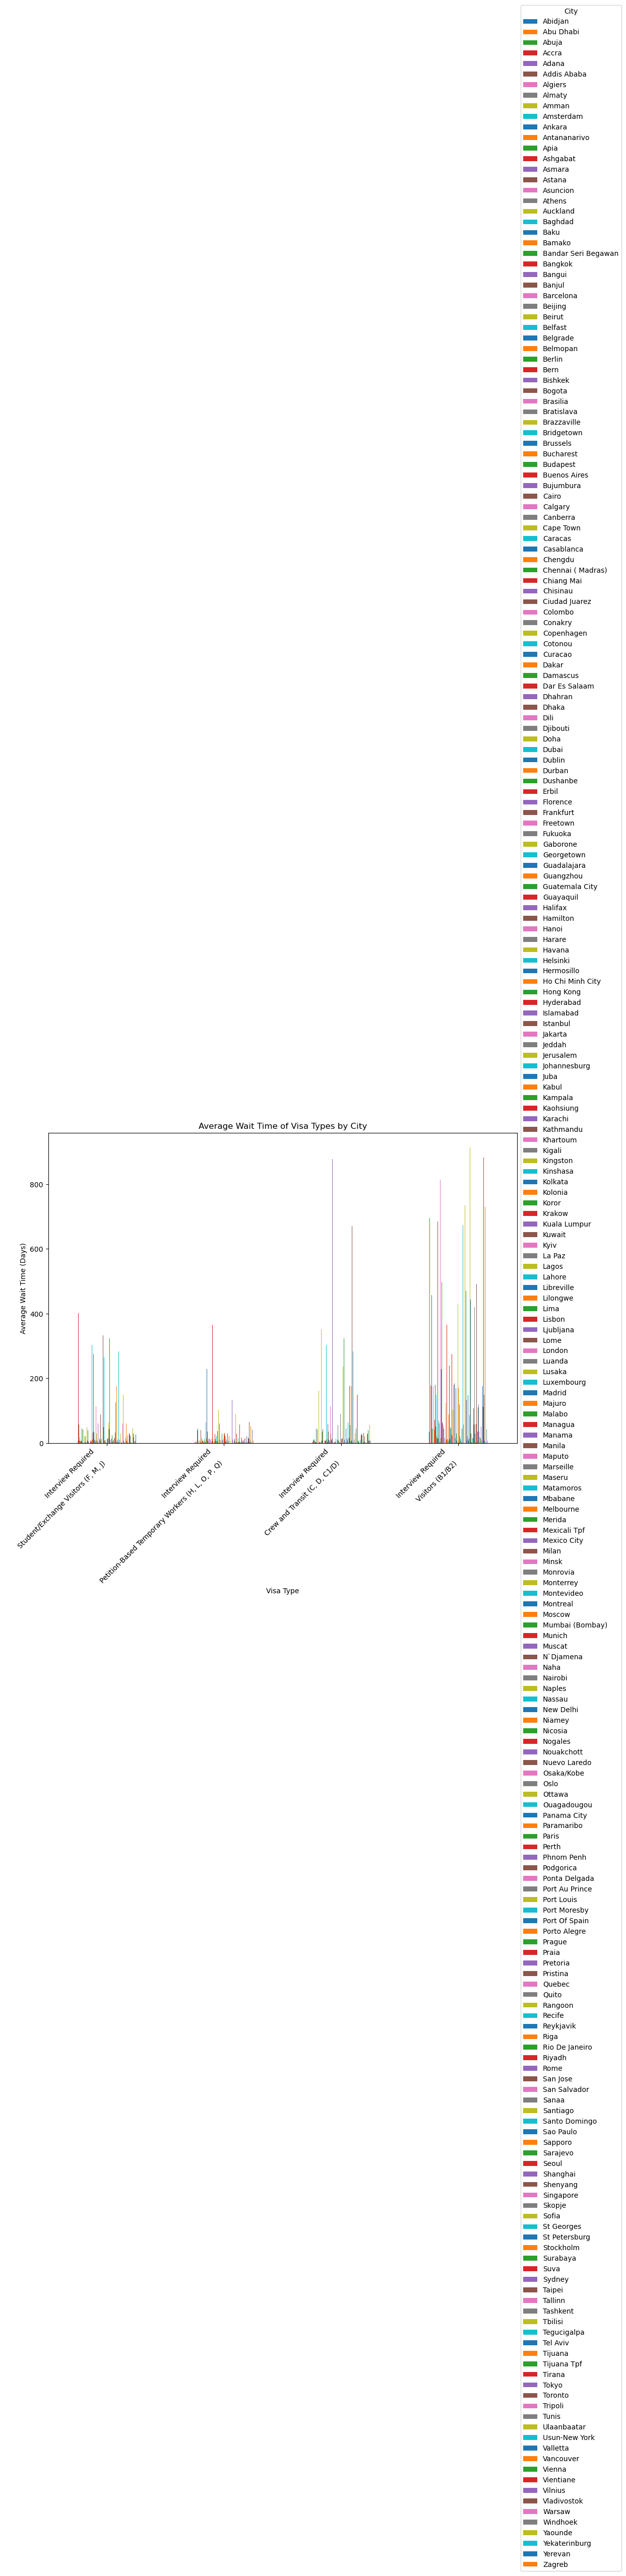

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

wt = pd.read_excel("Global Visa Wait Times recent (1).xlsx")

wt = wt.dropna(subset=['City/Post'])

visa_types = ['Interview Required\n\nStudent/Exchange Visitors (F, M, J)', 
              'Interview Required\n\nPetition-Based Temporary Workers (H, L, O, P, Q)', 
              'Interview Required\n\nCrew and Transit (C, D, C1/D)', 
              'Interview Required\n\nVisitors (B1/B2)']

city_visa_wait_times = {}

for city in wt['City/Post'].unique():
    city_data = wt[wt['City/Post'] == city]
    visa_wait_times = []
    for visa_type in visa_types:
        try:
            wait_times = city_data[visa_type].str.split().str[0].astype(float)
            mean_wait_time = wait_times.mean()
        except ValueError:
            mean_wait_time = None
        visa_wait_times.append(mean_wait_time)
    city_visa_wait_times[city] = visa_wait_times

city_visa_wait_times_df = pd.DataFrame(city_visa_wait_times, index=visa_types)

ax = city_visa_wait_times_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Wait Time of Visa Types by City')
plt.xlabel('Visa Type')
plt.ylabel('Average Wait Time (Days)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='City', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()



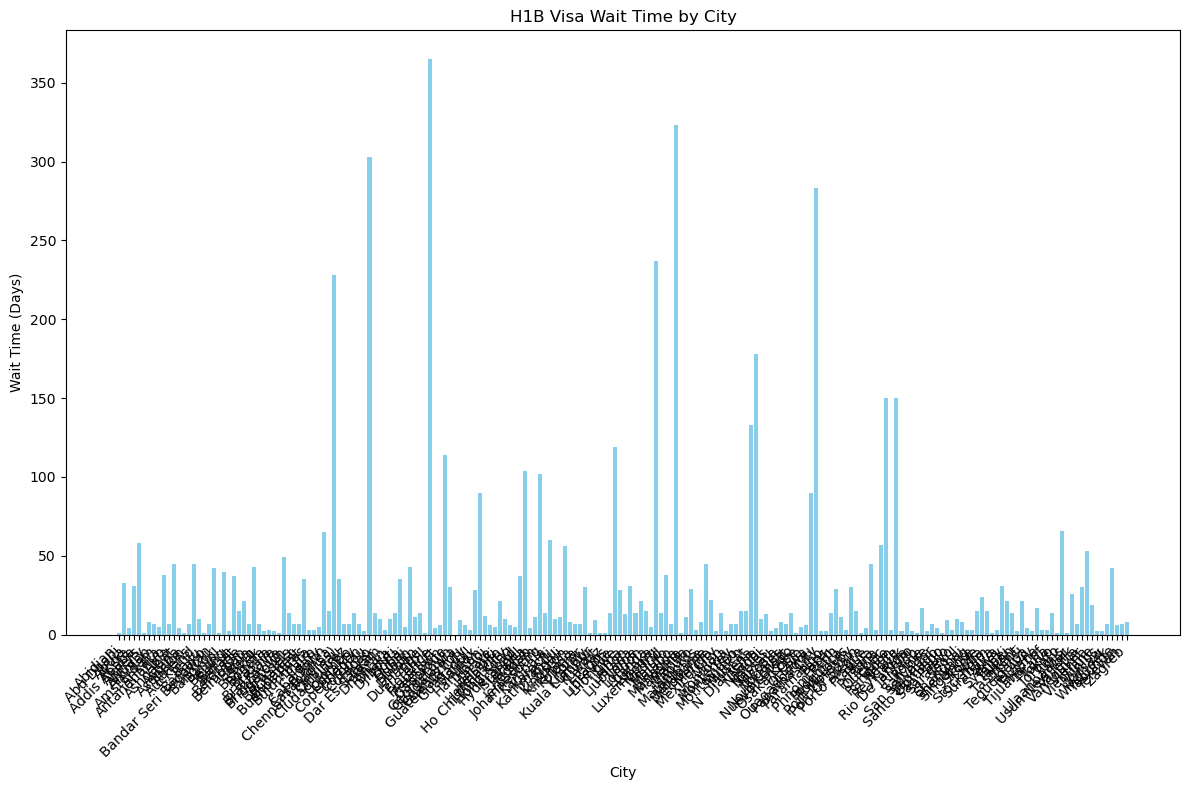

In [13]:
h1b_data = wt[['City/Post', 'Interview Required\n\nPetition-Based Temporary Workers (H, L, O, P, Q)']].dropna()

h1b_data['H1B Wait Time'] = h1b_data['Interview Required\n\nPetition-Based Temporary Workers (H, L, O, P, Q)'].str.extract('(\d+)', expand=False).astype(float)

plt.figure(figsize=(12, 8))
plt.bar(h1b_data['City/Post'], h1b_data['H1B Wait Time'], color='skyblue')
plt.title('H1B Visa Wait Time by City')
plt.xlabel('City')
plt.ylabel('Wait Time (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
max_wait = h1b_data['H1B Wait Time'].max()
min_wait = h1b_data['H1B Wait Time'].min()
city_max_wait = h1b_data[h1b_data['H1B Wait Time'] == max_wait]['City/Post'].values[0]
city_min_wait = h1b_data[h1b_data['H1B Wait Time'] == min_wait]['City/Post'].values[0]

print(f"The city with the highest H1B visa wait time is {city_max_wait} with {max_wait} days.")
print(f"The city with the lowest H1B visa wait time is {city_min_wait} with {min_wait} days.")



The city with the highest H1B visa wait time is Erbil with 365.0 days.
The city with the lowest H1B visa wait time is Abidjan with 1.0 days.
